In [29]:
#importing
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import keras
import pandas as pd
import xgboost as xgb

In [30]:
XGBoost_data = np.loadtxt('XGBoost_distances_xgboost.csv')
MLP_data = np.loadtxt('MLP_distances.csv')

In [31]:
#manual inspection
XGBoost_best = XGBoost_data.reshape((-1, 245, 245))[9]
MLP_best = MLP_data.reshape((-1, 245, 245))[1]

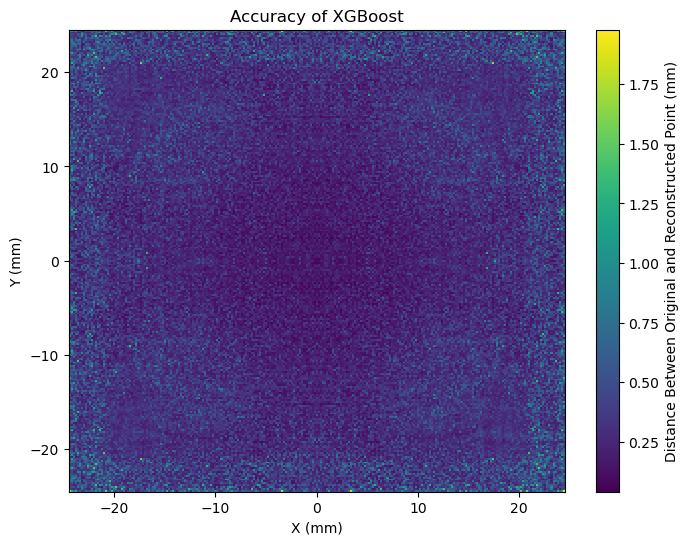

In [32]:
#XGBoost colormap
xaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
yaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
#creating colormap
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, XGBoost_best, shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of XGBoost')

# Display the plot
plt.savefig("xgboost_accuracy.png")

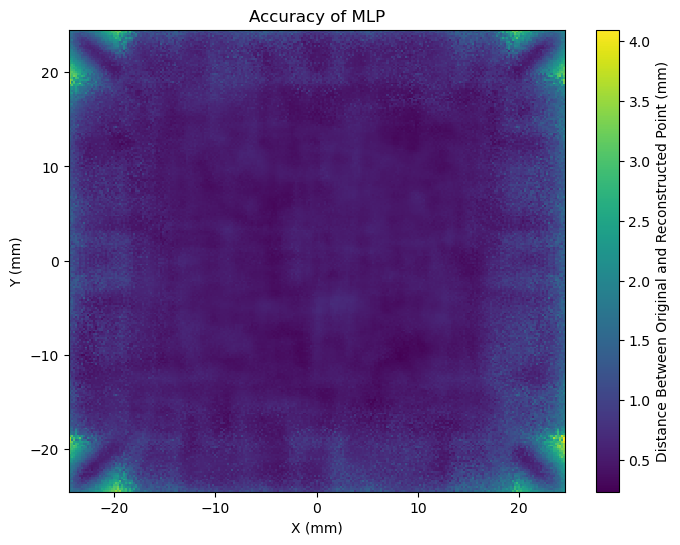

In [33]:
#MLP colormap
xaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
yaxis = 1000*np.linspace(-0.0244, 0.0244, 245)
#creating colormap
plt.figure(figsize=(8, 6))
plt.pcolormesh(xaxis, yaxis, MLP_best, shading='auto', cmap='viridis')

# Add color bar
plt.colorbar(label='Distance Between Original and Reconstructed Point (mm)')

# Add labels and title
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Accuracy of MLP')

# Display the plot
plt.savefig("MLP_accuracy.png")

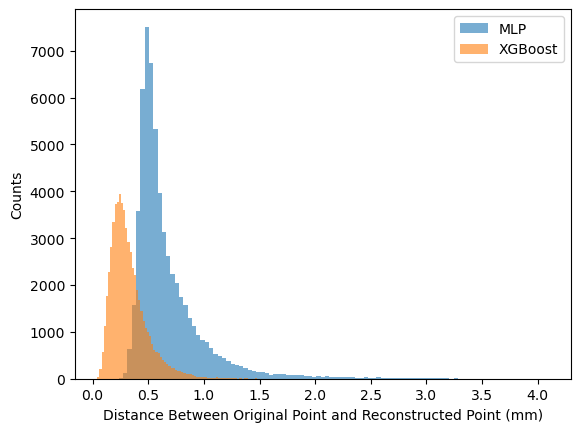

In [34]:
#histogram comparing both methods
plt.hist(MLP_best.ravel(), bins=100, alpha=0.6, label='MLP')
plt.hist(XGBoost_best.ravel(), bins=100, alpha=0.6, label='XGBoost')
plt.xlabel('Distance Between Original Point and Reconstructed Point (mm)')
plt.ylabel('Counts')
plt.legend(loc='upper right')
plt.savefig("comparison_histogram.png")

In [35]:
#averages
print("Average XGBoost Distance (mm): " + str(np.average(XGBoost_best)))
print("Average XGBoost Distance (mm): " + str(np.average(MLP_best)))

Average XGBoost Distance (mm): 0.32635259936305416
Average XGBoost Distance (mm): 0.680779398166009


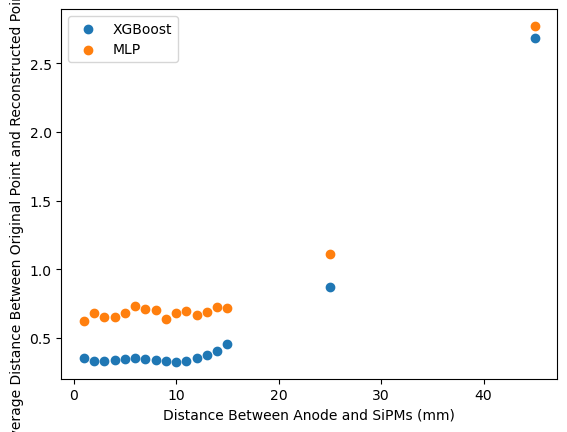

In [36]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 25, 45]
XGBoosty = []
MLPy = []
for i in range(len(x)):
    XGBoosty.append(np.average(XGBoost_data[i]))
    MLPy.append(np.average(MLP_data[i]))

plt.xlabel('Distance Between Anode and SiPMs (mm)')
plt.ylabel('Average Distance Between Original Point and Reconstructed Point (mm)')
plt.scatter(x, XGBoosty, label='XGBoost')
plt.scatter(x, MLPy, label='MLP')
plt.legend(loc='upper left')
plt.savefig("comparison_scatter.png")